In [17]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def smoothing(arr, radius=10):
    y = []
    for i in range(len(arr)):
        y.append(np.mean(arr[i:radius+i]))
    return np.array(y)

In [41]:
# Import files and Generate plot data
plotdata_1 = pd.read_csv('data/Primary-model/PPO-LunarLander10000x5-rewards-train.csv', index_col=0)
plotdata_1_ = pd.read_csv('data/Adv-model/PPOadv-LunarLander2000x5-rewards-train.csv', index_col=0)
plotdata_2 = pd.read_csv('data/Noise/PPO-LunarLander100x10-rewards-testNoise_0.csv', index_col=0)
plotdata_3 = pd.read_csv('data/Noise/PPO-LunarLander100x10-rewards-testNoise_1.csv', index_col=0)
plotdata_4 = pd.read_csv('data/Noise/PPO-LunarLander100x10-rewards-testNoise_3.csv', index_col=0)
plotdata_5 = pd.read_csv('data/Noise/PPO-LunarLander100x10-rewards-testNoise_5.csv', index_col=0)
plotdata_6 = pd.read_csv('data/Noise/PPO-LunarLander100x10-rewards-testNoise_7.csv', index_col=0)
plotdata_7 = pd.read_csv('data/Noise/PPO-LunarLander100x10-rewards-testNoise_9.csv', index_col=0)

n_episodes_train, n_trials_train = plotdata_1.shape
n_episodes_train_, n_trials_train_ = plotdata_1_.shape
n_episodes_test, n_trials_test = plotdata_2.shape
n_episodes_testFGSM0_1, n_trials_testFGSM0_1 = plotdata_3.shape
n_episodes_testFGSM0_3, n_trials_testFGSM0_3 = plotdata_4.shape
n_episodes_testFGSM0_5, n_trials_testFGSM0_5 = plotdata_5.shape
n_episodes_testFGSM0_7, n_trials_testFGSM0_7 = plotdata_6.shape
n_episodes_testFGSM0_9, n_trials_testFGSM0_9 = plotdata_7.shape

train_x = [i+1 for i in range(n_episodes_train)]
train_x_ = [i+1 for i in range(n_episodes_train_)]
test_x = [i+1 for i in range(n_episodes_test)]
testFGSM0_1_x = [i+1 for i in range(n_episodes_testFGSM0_1)]
testFGSM0_3_x = [i+1 for i in range(n_episodes_testFGSM0_3)]
testFGSM0_5_x = [i+1 for i in range(n_episodes_testFGSM0_5)]
testFGSM0_7_x = [i+1 for i in range(n_episodes_testFGSM0_7)]
testFGSM0_9_x = [i+1 for i in range(n_episodes_testFGSM0_9)]

mean_vals_1 = plotdata_1.mean(axis=1)
std_vals_1 = plotdata_1.std(axis=1)
mean_vals_1_ = plotdata_1_.mean(axis=1)
std_vals_1_ = plotdata_1_.std(axis=1)
mean_vals_2 = plotdata_2.mean(axis=1)
std_vals_2 = plotdata_2.std(axis=1)
mean_vals_3 = plotdata_3.mean(axis=1)
std_vals_3 = plotdata_3.std(axis=1)
mean_vals_4 = plotdata_4.mean(axis=1)
std_vals_4 = plotdata_4.std(axis=1)
mean_vals_5 = plotdata_5.mean(axis=1)
std_vals_5 = plotdata_5.std(axis=1)
mean_vals_6 = plotdata_6.mean(axis=1)
std_vals_6 = plotdata_6.std(axis=1)
mean_vals_7 = plotdata_7.mean(axis=1)
std_vals_7 = plotdata_7.std(axis=1)

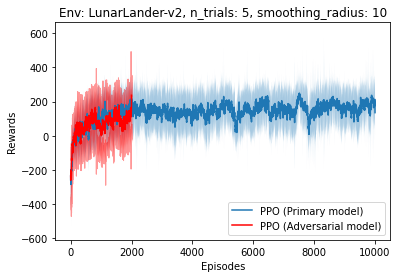

In [42]:
radius = 10
mean_vals = smoothing(mean_vals_1, radius)
std_vals = smoothing(std_vals_1, radius=1)
mean_vals_ = smoothing(mean_vals_1_, radius)
std_vals_ = smoothing(std_vals_1_, radius=1)  

plt.figure()

plt.title("Env: LunarLander-v2, n_trials: 5, smoothing_radius: {}".format(radius))
plt.xlabel("Episodes")
plt.ylabel("Rewards")

H = 10000
plt.plot(train_x[:H], mean_vals[:H], label='PPO (Primary model)')
plt.fill_between(train_x[:H], mean_vals[:H]-std_vals[:H], mean_vals[:H]+std_vals[:H], alpha=0.4)

plt.plot(train_x_, mean_vals_, label='PPO (Adversarial model)', color='red')
plt.fill_between(train_x_, mean_vals_-std_vals_, mean_vals_+std_vals_, alpha=0.4, color='red')

plt.legend(loc='lower right')

plt.savefig('plots/LunarLanderPMvsAdv-train_smooth')
plt.show()

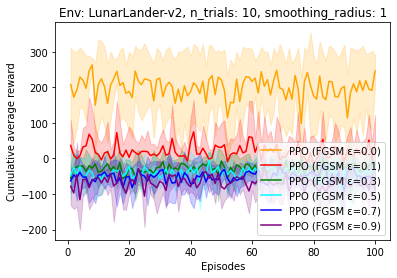

In [43]:
radius = 1
y_2 = smoothing(mean_vals_2, radius)
y_2_var = smoothing(std_vals_2, radius=1)
y_3 = smoothing(mean_vals_3, radius)
y_3_var = smoothing(std_vals_3, radius=1)
y_4 = smoothing(mean_vals_4, radius)
y_4_var = smoothing(std_vals_4, radius=1)
y_5 = smoothing(mean_vals_5, radius)
y_5_var = smoothing(std_vals_5, radius=1)
y_6 = smoothing(mean_vals_6, radius)
y_6_var = smoothing(std_vals_6, radius=1)
y_7 = smoothing(mean_vals_7, radius)
y_7_var = smoothing(std_vals_7, radius=1)

plt.figure()

plt.title("Env: LunarLander-v2, n_trials: 10, smoothing_radius: {}".format(radius))
plt.xlabel("Episodes")
plt.ylabel("Cumulative average reward")

color = "orange"
plt.plot(test_x, y_2, label='PPO (FGSM \u03B5=0.0)', color=color)
plt.fill_between(test_x, y_2-y_2_var, y_2+y_2_var, alpha=0.2, color=color)

color = "red"
plt.plot(testFGSM0_1_x, y_3, label='PPO (FGSM \u03B5=0.1)', color=color)
plt.fill_between(testFGSM0_1_x, y_3-y_3_var, y_3+y_3_var, alpha=0.2, color=color)

color = "green"
plt.plot(testFGSM0_3_x, y_4, label='PPO (FGSM \u03B5=0.3)', color=color)
plt.fill_between(testFGSM0_3_x, y_4-y_4_var, y_4+y_4_var, alpha=0.2, color=color)

color = "cyan"
plt.plot(testFGSM0_5_x, y_5, label='PPO (FGSM \u03B5=0.5)', color=color)
plt.fill_between(testFGSM0_5_x, y_5-y_5_var, y_5+y_5_var, alpha=0.2, color=color)

color = "blue"
plt.plot(testFGSM0_7_x, y_6, label='PPO (FGSM \u03B5=0.7)', color=color)
plt.fill_between(testFGSM0_7_x, y_6-y_6_var, y_6+y_6_var, alpha=0.2, color=color)

color = "purple"
plt.plot(testFGSM0_9_x, y_7, label='PPO (FGSM \u03B5=0.9)', color=color)
plt.fill_between(testFGSM0_9_x, y_7-y_7_var, y_7+y_7_var, alpha=0.2, color=color)

plt.legend(loc='lower right')

plt.savefig('plots/Noise_LunarLander1000-testNoise_Combined')
plt.show()

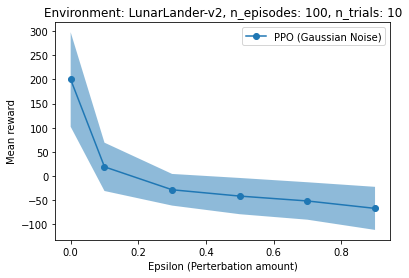

In [44]:
y_2 = mean_vals_2.mean()
y_3 = mean_vals_3.mean()
y_4 = mean_vals_4.mean()
y_5 = mean_vals_5.mean()
y_6 = mean_vals_6.mean()
y_7 = mean_vals_7.mean()

std_y_2 = std_vals_2.mean()
std_y_3 = std_vals_3.mean()
std_y_4 = std_vals_4.mean()
std_y_5 = std_vals_5.mean()
std_y_6 = std_vals_6.mean()
std_y_7 = std_vals_7.mean()

plt.figure()
plt.title("Environment: LunarLander-v2, n_episodes: 100, n_trials: 10")
plt.xlabel("Epsilon (Perterbation amount)")
plt.ylabel("Mean reward")

epsilon = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]
mean_reward = np.array([y_2, y_3, y_4, y_5, y_6, y_7])
mean_std = np.array([std_y_2, std_y_3, std_y_4, std_y_5, std_y_6, std_y_7])

plt.plot(epsilon, mean_reward, label='PPO (Gaussian Noise)', marker='o')
plt.fill_between(epsilon, mean_reward+mean_std, mean_reward-mean_std, alpha=0.5)
plt.legend(loc='upper right')

plt.savefig('plots/Noise_LunarLander1000-epsilonVSMeanReward')
d = pd.DataFrame(data={"Epsilon":epsilon, "mean_reward": mean_reward, "std_reward": mean_std})
d.to_csv('data/Noise/PPO-perturbation-effects-LunarLander.csv')
plt.show()